In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [61]:
session_df = pd.read_csv('session_df.csv')
summary_df = pd.read_csv('summary_data.csv')

arm = 'Tutor Feedback'
summary_df = summary_df[summary_df['arm_name'] == arm]

In [62]:
covariates = ["attendance_1", "rating_1", "session_duration_1", "talktime_tutor_pct_1",
    "spoken_token_tutor_pct_1", "chat_token_tutor_pct_1", "length_utterance_tutor_1",
    "length_utterance_student_1", "length_utterance_tutor_chat_1", "length_utterance_student_chat_1",
    "ratio_students_engaged_1", "normalized_num_student_names_used_1", "normalized_num_turns_1",
    "normalized_num_high_uptakes_1", "normalized_num_eliciting_1", "normalized_num_questions_students_1",
    "normalized_num_questions_tutor_1", "normalized_student_reasoning_1",
    "count_acknowledged", "count_reflection_share", "count_is_reflected", "min_sat_score_series",
    "max_sat_score_series", "grade_for_session_1"]

outcome_vars = ['grade_change', 'uptake_change', 'eliciting_change']

In [63]:
summary_df.columns

Index(['series_uuid', 'attendance_1', 'rating_1', 'session_duration_1',
       'talktime_tutor_pct_1', 'spoken_token_tutor_pct_1',
       'chat_token_tutor_pct_1', 'length_utterance_tutor_1',
       'length_utterance_student_1', 'length_utterance_tutor_chat_1',
       'length_utterance_student_chat_1', 'ratio_students_engaged_1',
       'normalized_num_student_names_used_1', 'normalized_num_turns_1',
       'normalized_num_high_uptakes_1', 'normalized_num_questions_students_1',
       'normalized_num_questions_tutor_1', 'normalized_student_reasoning_1',
       'arm_name', 'count_acknowledged', 'count_reflection_share',
       'count_is_reflected', 'min_sat_score_series', 'max_sat_score_series',
       'grade_for_session_1', 'grade_for_session_2', 'grade_for_session_3',
       'grade_for_session_4', 'grade_for_session_7', 'uptake_session_1',
       'uptake_session_7', 'normalized_num_eliciting_1',
       'normalized_num_eliciting_7', 'grade_change', 'uptake_change',
       'eliciting_ch

In [64]:
filtered_df = summary_df[covariates]
outcome_df = summary_df[outcome_vars]

# # Drop the column with the independent variable (Salary), and columns for which we created dummy variables
# filtered_df = filtered_df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')

# # Define the feature set X.
# X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)

filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 1 to 627
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   attendance_1                         217 non-null    int64  
 1   rating_1                             217 non-null    float64
 2   session_duration_1                   217 non-null    float64
 3   talktime_tutor_pct_1                 217 non-null    float64
 4   spoken_token_tutor_pct_1             217 non-null    float64
 5   chat_token_tutor_pct_1               217 non-null    float64
 6   length_utterance_tutor_1             217 non-null    float64
 7   length_utterance_student_1           217 non-null    float64
 8   length_utterance_tutor_chat_1        217 non-null    float64
 9   length_utterance_student_chat_1      217 non-null    float64
 10  ratio_students_engaged_1             217 non-null    float64
 11  normalized_num_student_names_used_1  

# RIDGE REGRESSIOM

In [66]:
alphas = 10**np.linspace(10,-2,100)*0.5

ridge = Ridge() # normalize=True
coefs = []

X = filtered_df # a df with samples from one specific arm, with specified covariates
y = outcome_df['uptake_change']

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 24)

Text(0, 0.5, 'weights')

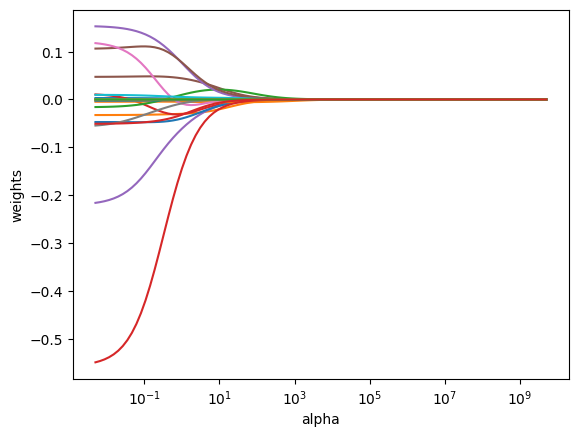

In [67]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [68]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [70]:
ridge2 = Ridge(alpha = 4) # normalize = True
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2))          # Calculate the test MSE

attendance_1                           0.004078
rating_1                              -0.035419
session_duration_1                     0.000400
talktime_tutor_pct_1                  -0.007182
spoken_token_tutor_pct_1              -0.014450
chat_token_tutor_pct_1                 0.057826
length_utterance_tutor_1               0.000073
length_utterance_student_1             0.000299
length_utterance_tutor_chat_1         -0.001395
length_utterance_student_chat_1        0.000775
ratio_students_engaged_1              -0.002246
normalized_num_student_names_used_1   -0.003623
normalized_num_turns_1                 0.028302
normalized_num_high_uptakes_1         -0.029495
normalized_num_eliciting_1             0.010977
normalized_num_questions_students_1    0.022788
normalized_num_questions_tutor_1      -0.000093
normalized_student_reasoning_1        -0.006496
count_acknowledged                     0.007933
count_reflection_share                 0.007045
count_is_reflected                     0

In [72]:
ridge3 = Ridge(alpha = 10**10) # normalize = True
ridge3.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge3.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred3))          # Calculate the test MSE

attendance_1                           2.423969e-10
rating_1                              -8.191017e-11
session_duration_1                     1.101486e-10
talktime_tutor_pct_1                  -1.610639e-11
spoken_token_tutor_pct_1              -1.325290e-11
chat_token_tutor_pct_1                -1.381236e-11
length_utterance_tutor_1               1.496408e-07
length_utterance_student_1             1.027634e-08
length_utterance_tutor_chat_1         -5.726259e-09
length_utterance_student_chat_1        5.052422e-10
ratio_students_engaged_1              -6.155311e-12
normalized_num_student_names_used_1   -5.615262e-10
normalized_num_turns_1                 1.040291e-11
normalized_num_high_uptakes_1         -1.842760e-11
normalized_num_eliciting_1            -7.815890e-13
normalized_num_questions_students_1    2.392895e-11
normalized_num_questions_tutor_1      -2.440838e-11
normalized_student_reasoning_1        -1.775426e-12
count_acknowledged                     3.197987e-11
count_reflec

In [73]:
ridge2 = Ridge(alpha = 0) # normalize = True
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred = ridge2.predict(X_test)            # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred))           # Calculate the test MSE

attendance_1                           5.786917e-03
rating_1                              -4.939015e-02
session_duration_1                     6.125782e-04
talktime_tutor_pct_1                   8.667412e-02
spoken_token_tutor_pct_1              -2.303803e-01
chat_token_tutor_pct_1                 8.305299e-02
length_utterance_tutor_1               7.194822e-05
length_utterance_student_1             4.279033e-04
length_utterance_tutor_chat_1         -1.627391e-03
length_utterance_student_chat_1        1.162540e-03
ratio_students_engaged_1               7.608149e-03
normalized_num_student_names_used_1   -5.157033e-03
normalized_num_turns_1                -6.158000e-03
normalized_num_high_uptakes_1         -5.378618e-01
normalized_num_eliciting_1             9.970945e-02
normalized_num_questions_students_1    7.182300e-02
normalized_num_questions_tutor_1       1.854420e-01
normalized_student_reasoning_1        -3.413878e-01
count_acknowledged                     2.201925e-03
count_reflec

In [74]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error') # normalize = True
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

8148754.173103217

In [76]:
ridge4 = Ridge(alpha = ridgecv.alpha_) # normalize = True
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

0.01066664140434756

In [77]:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

attendance_1                           2.119441e-07
rating_1                              -6.199301e-08
session_duration_1                     3.128921e-06
talktime_tutor_pct_1                  -4.201907e-08
spoken_token_tutor_pct_1              -3.841149e-08
chat_token_tutor_pct_1                -1.524513e-08
length_utterance_tutor_1               3.292267e-05
length_utterance_student_1             8.490219e-06
length_utterance_tutor_chat_1         -3.802625e-06
length_utterance_student_chat_1        3.363346e-06
ratio_students_engaged_1              -2.371596e-08
normalized_num_student_names_used_1   -7.415147e-07
normalized_num_turns_1                 1.978411e-07
normalized_num_high_uptakes_1         -2.570415e-08
normalized_num_eliciting_1             2.195725e-08
normalized_num_questions_students_1    6.336025e-08
normalized_num_questions_tutor_1       1.175624e-09
normalized_student_reasoning_1         2.812675e-09
count_acknowledged                     8.652234e-09
count_reflec

# LASSO REGRESSION

Text(0, 0.5, 'weights')

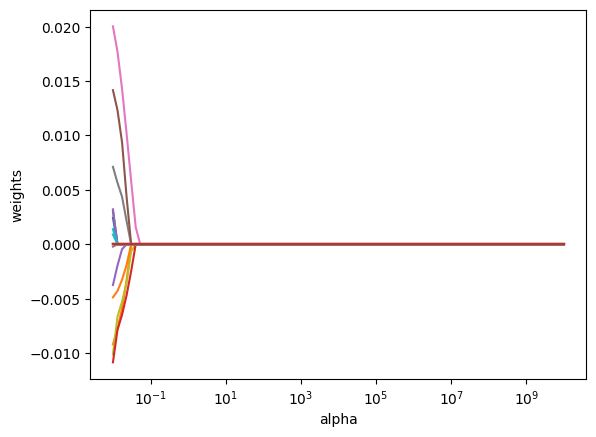

In [78]:
lasso = Lasso(max_iter = 10000) # , normalize = True
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [80]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000) # normalize = True
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

0.011546639298469257

In [81]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

attendance_1                           0.000000e+00
rating_1                              -0.000000e+00
session_duration_1                     0.000000e+00
talktime_tutor_pct_1                  -0.000000e+00
spoken_token_tutor_pct_1              -0.000000e+00
chat_token_tutor_pct_1                 0.000000e+00
length_utterance_tutor_1               4.533697e-05
length_utterance_student_1             1.816706e-04
length_utterance_tutor_chat_1         -5.011311e-04
length_utterance_student_chat_1        0.000000e+00
ratio_students_engaged_1              -0.000000e+00
normalized_num_student_names_used_1   -0.000000e+00
normalized_num_turns_1                 0.000000e+00
normalized_num_high_uptakes_1         -0.000000e+00
normalized_num_eliciting_1             0.000000e+00
normalized_num_questions_students_1    0.000000e+00
normalized_num_questions_tutor_1       0.000000e+00
normalized_student_reasoning_1        -0.000000e+00
count_acknowledged                     0.000000e+00
count_reflec

## SANDBOX BELOW

In [ ]:
def split_dataset(df, arm_column='arm_name', train_size=0.7):
    train_list = []
    val_list = []
    
    # Get unique arms
    arms = df[arm_column].unique()
    
    for arm in arms:
        # Filter data for the current arm
        arm_data = df[df[arm_column] == arm]
        
        # Split data for the current arm
        train, val = train_test_split(arm_data, train_size=train_size, random_state=42)
        
        # Append the results to the lists
        train_list.append(train)
        val_list.append(val)
    
    # Concatenate the results
    train_set = pd.concat(train_list)
    val_set = pd.concat(val_list)
    
    return train_set, val_set

train_set, val_set = split_dataset(summary_df)

In [31]:
def linear_regression(data, power, models_to_plot, x='normalized_num_questions_students_1', y='uptake_change'):
    # Initialize predictors
    predictors = [x]
    if power >= 2:
        predictors.extend(['x_%d' % i for i in range(2, power + 1)])
    
    # Standardize the predictors
    scaler = StandardScaler()
    data[predictors] = scaler.fit_transform(data[predictors])
    
    # Fit the model
    linreg = LinearRegression()
    linreg.fit(data[predictors], data[y])
    y_pred = linreg.predict(data[predictors])
    
    # Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.figure(figsize=(12, 10))
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data[x], y_pred, label='Predicted')
        plt.plot(data[x], data[y], '.', label='Actual')
        plt.title(f'Plot for power: {power}')
        plt.legend()
    
    # Return the result in pre-defined format
    rss = sum((y_pred - data[y]) ** 2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

KeyError: "['x_2'] not in index"

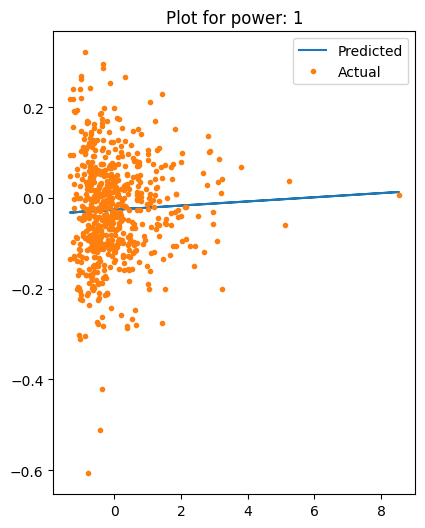

In [32]:
covariates = ["attendance_1", "rating_1", "session_duration_1", "talktime_tutor_pct_1",
    "spoken_token_tutor_pct_1", "chat_token_tutor_pct_1", "length_utterance_tutor_1",
    "length_utterance_student_1", "length_utterance_tutor_chat_1", "length_utterance_student_chat_1",
    "ratio_students_engaged_1", "normalized_num_student_names_used_1", "normalized_num_turns_1",
    "normalized_num_high_uptakes_1", "normalized_num_eliciting_1", "normalized_num_questions_students_1",
    "normalized_num_questions_tutor_1", "normalized_student_reasoning_1", "arm_name",
    "count_acknowledged", "count_reflection_share", "count_is_reflected", "min_sat_score_series",
    "max_sat_score_series", "grade_for_session_1", "grade_for_session_2",
    "grade_for_session_3", "grade_for_session_4", "grade_for_session_7"]

# Initialize a dataframe to store the results
col = ['rss', 'intercept'] + ['coef_x_%d' % i for i in range(1, 16)]
ind = ['model_pow_%d' % i for i in range(1, 16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

# Define the powers for which a plot is required
models_to_plot = {1: 231, 3: 232, 6: 233, 9: 234, 12: 235, 15: 236}

# Iterate through all powers and assimilate results
for i in range(1, 16):
    coef_matrix_simple.iloc[i - 1, 0:i + 2] = linear_regression(summary_df, power=i, models_to_plot=models_to_plot)

# Show the plots
plt.show()

# Display the coefficient matrix
print(coef_matrix_simple)

DataFrame columns: Index(['x1', 'x2', 'y', 'x1_2', 'x2_2', 'x1_3', 'x2_3', 'x1_4', 'x2_4', 'x1_5',
       'x2_5', 'x1_6', 'x2_6', 'x1_7', 'x2_7', 'x1_8', 'x2_8', 'x1_9', 'x2_9',
       'x1_10', 'x2_10', 'x1_11', 'x2_11', 'x1_12', 'x2_12', 'x1_13', 'x2_13',
       'x1_14', 'x2_14', 'x1_15', 'x2_15'],
      dtype='object')


ValueError: could not broadcast input array from shape (32,) into shape (3,)

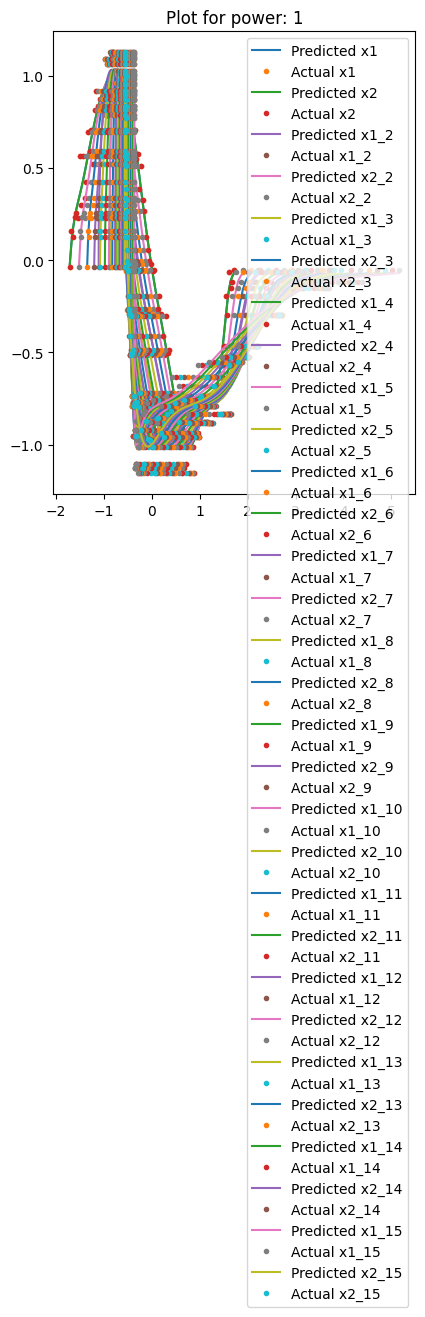

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

def linear_regression(data, power, models_to_plot):
    # Initialize predictors (covariates)
    predictors = [col for col in data.columns if col.startswith('x')]
    
    # Create polynomial features up to the specified power
    for col in predictors:
        base_col = col.split('_')[0]
        for i in range(2, power + 1):
            new_col = f'{base_col}_{i}'
            data[new_col] = data[col] ** i
            predictors.append(new_col)
    
    # Ensure columns exist in the DataFrame
    missing_cols = [col for col in predictors if col not in data.columns]
    if missing_cols:
        raise KeyError(f"Columns missing in the DataFrame: {missing_cols}")
    
    # Standardize the predictors
    scaler = StandardScaler()
    data[predictors] = scaler.fit_transform(data[predictors])
    
    # Fit the model
    linreg = LinearRegression()
    linreg.fit(data[predictors], data['y'])
    y_pred = linreg.predict(data[predictors])
    
    # Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.figure(figsize=(12, 10))
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        for col in data.columns:
            if col.startswith('x'):
                plt.plot(data[col], y_pred, label=f'Predicted {col}')
                plt.plot(data[col], data['y'], '.', label=f'Actual {col}')
        plt.title(f'Plot for power: {power}')
        plt.legend()
    
    # Return the result in pre-defined format
    rss = sum((y_pred - data['y']) ** 2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

# Example data generation (replace with your actual data)
summary_df = pd.DataFrame({
    'x1': np.linspace(0, 1, 100),
    'x2': np.linspace(1, 2, 100),
    'y': np.sin(2 * np.pi * np.linspace(0, 1, 100)) + np.random.normal(0, 0.1, 100)
})
for i in range(2, 16):
    summary_df[f'x1_{i}'] = summary_df['x1'] ** i
    summary_df[f'x2_{i}'] = summary_df['x2'] ** i

# Ensure the columns are correctly set up
print("DataFrame columns:", summary_df.columns)

# Initialize a dataframe to store the results
col = ['rss', 'intercept'] + ['coef_x1_%d' % i for i in range(1, 16)] + ['coef_x2_%d' % i for i in range(1, 16)]
ind = ['model_pow_%d' % i for i in range(1, 16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

# Define the powers for which a plot is required
models_to_plot = {1: 231, 3: 232, 6: 233, 9: 234, 12: 235, 15: 236}

# Iterate through all powers and assimilate results
for i in range(1, 16):
    coef_matrix_simple.iloc[i - 1, 0:i + 2] = linear_regression(summary_df, power=i, models_to_plot=models_to_plot)

# Show the plots
plt.show()

# Display the coefficient matrix
print(coef_matrix_simple)
